# Multilayer Perceptron

#### Karol Krupa, Paweł Flis

Low-level implementation of neural network in Python.

## Learning process visualization

In order to track the learning process iteration by iteration we need to pass an integer value **render_step** into train function. In this case user will be able to see weigths along with the gradients after every **render_step-th** batch. User can proceed to next iteration by pressing **Enter**

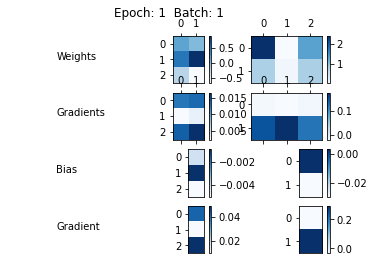

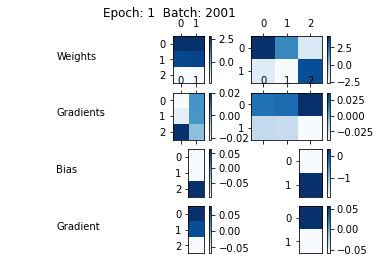

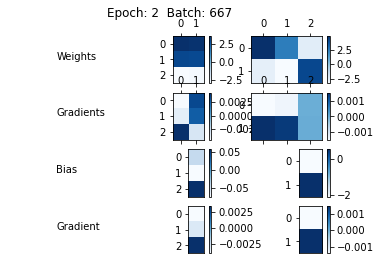

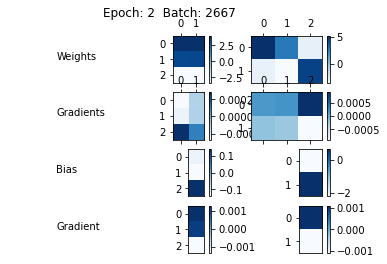

In [1]:
from Perceptron import *
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)

mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=2,
                     bias=True)
mlp.load("data\data.simple.train.10000.csv")
_ = mlp.train(render_step=2000)

## Compliance tests

### Classification

First test was conducted on data.simple dataset.

In [2]:
from Perceptron import *
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=1,
                     bias=False)
mlp.load("data\data.simple.train.10000.csv")
_ = mlp.train()
mlp.test_classification("data\data.simple.test.10000.csv")

Success ratio: 0.9927


The model trained during just one epoch turns out to achieve extremely good results. Thats is caused by the fact, that the data set is indeed simple and almost linearly separable.

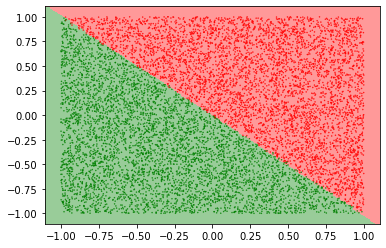

In [3]:
draw_classification(mlp, "data\data.simple.test.10000.csv")

Next test was conducted on **data.three_gauss** dataset.  **SM_CE** flag set as **True** means that provided final activation function and loss function will be ignored and **Softmax** activation with **Cross entropy** loss will be used instead. This combination is used due to simplified derivative of this composite $$\frac{\partial E}{\partial y_j}=predicted_j-actual_j$$ 

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 SM_CE=True,
                 batch_size=3,
                 learning_rate=0.1,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
_ = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")

In this case model achieves satisfactory results. As we can see on the image below all three sets intersect with each other in proximity of point (0,0).

In [ ]:
draw_classification(mlp, "data\data.three_gauss.test.10000.csv")

## Regression

We tested the regression funcinality with custom generated dataset from function $y=x^2$.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=30,
                 bias=True)

mlp.load("data\quadratic1_train.csv")
_ = mlp.train()
draw_regression2d(mlp, x=np.linspace(-5, 5, 1000), func=lambda x: x**2)

The model converges and models the function accurately. By trial we deduced that it is important to use very low learning_rate value and low momentum in case of regression problem.

Three dimensional function $z=x^2+xy+5x-1$

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[12],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=30,
                 bias=True)

mlp.load("data\\3d_train.csv")
_ = mlp.train()
draw_regression3d(mlp,
                  x=np.linspace(-5, 5, 50),
                  y=np.linspace(-5, 5, 50),
                  func=lambda x, y:  x**2+x*y+5*x-1)

## Activation function analysis

We will test different activation functions in classification of three_gauss set of data. Rest of the parameters will be the same.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=tanh,
                 dActivation=dTanh,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

We can see that in this case usage of tanh activation allows us to converge faster as there is a visible dip in sigmoid's learning curve. Furthermore the success ratio seems to be pretty similar.

Both previous cases were tested with Mean Squared Error loss function. We would see model would behave with Softmax + Cross Entropy coombination.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=tanh,
                 dActivation=dTanh,
                 SM_CE=True,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

In this case model conversion proceeds visibly faster and allows us to achieve slightly better results.

We will test different activation functions in regression of function $y=x^2-3x-5$. Output layer function is identity.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=ReLU,
                 dActivation=dReLU,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=tanh,
                 dActivation=dTanh,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

## Number of layers analysis

We will try various number of layers with 3 neurons each. Rest of parameters will remain the same. The dataset is **three_gauss.train**.

In [ ]:
layers = [[],
          [3],
          [3, 3],
          [3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3, 3]]
for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'{ind} hidden layers' if ind != 1 else f'{ind} hidden layer'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

This may be counter-intuitive but the network complexity does not go in pair with better convergence. Usually 0-2 hidden layers is a standard and our experiment confirms that theory. Excessive (more than 2) number of hidden layers might slow down the learning process.

We will try various number of neurons (1, 2, 4, 8, ... 512) in one hidden layer. 

In [ ]:
layers = [[1],
          [2],
          [4],
          [8],
          [16],
          [32],
          [64],
          [128],
          [256],
          [512]]

for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'1 hidden layer with {2 ** ind} neurons' if ind != 0 else f'1 hidden layer with {2 ** ind} neuron'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

Introducing additional neurons in 3 layer model does not necessarily give better results. The results vary in different cases, although time needed to train the model is increasing.

Next 2 tests will be about regression of function $y=x^2$. In the first case we will test neural networks with one hidden layer having different neuron counts.

In [ ]:
layers = [[1],
          [2],
          [4],
          [8],
          [16],
          [32],
          [64],
          [128],
          [256],
          [512]]

for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     batch_size=3,
                     learning_rate=0.001,
                     momentum=0.1,
                     epochs=50,
                     bias=True)
    mlp.load("data\quadratic1_train.csv")
    losses = mlp.train()
    st = f'{2 ** ind} neurons' if ind != 0 else f'{2 ** ind} neuron'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

In this case introducing additional neurons seems to be improving the performance slightly.

The next test will use the same data as previous one but neural networks will have 2 hidden layers.

In [ ]:
layers = [[1, 1],
          [2, 2],
          [4, 4],
          [8, 8],
          [16, 16],
          [32, 32],
          [64, 64],
          [128, 128],
          [256, 256],
          [512, 512]]

for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     batch_size=3,
                     learning_rate=0.001,
                     momentum=0.1,
                     epochs=50,
                     bias=True)
    mlp.load("data\quadratic1_train.csv")
    losses = mlp.train()
    st = f'2 hidden layers, {2 ** ind} neurons each' if ind != 0 else f'2 hidden layers, {2 ** ind} neuron each'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

Providing the neural network with one additional layer seems to improve the final result in general but takes more time to execute.

## Loss function comparison

We will compare 3 loss functions: MSE (mean squared error), MAE (mean absolute error) and combination of Softmax activation with Cross entropy.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 loss=MSE,
                 dLoss=dMSE,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Model converges and provides us with satisfactory results. As we can see the learning curve is smooth and saturates in proximity of 150000th pass in spite of MSE's simple implementation.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 loss=MAE,
                 dLoss=dMAE,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Model converges in significantly worse fashion than the previous one. Interestingly, we can notice dip in learning efficiency around 50000th pass. Moreover, achieved success ratio is only 0.62 - way below standards, although somewhat positive.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 SM_CE=True,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Combination of Cross entropy loss function and Softmax activation function gives good results. Learning curve saturates around 50000th sample - it is approximately 3 times 'faster' than MSE loss function.